In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import pathlib
import seaborn as sns
import pandas as pd
sns.set_context('talk')
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path_list = [
    "/storage/vbutoi/scratch/ESE/training/11_11_24_ISLES_FixedPropEstimationExp",
]

df_list_1 = []
for path in path_list:
    try:
        dfc = rs.load_configs(
            path,
            properties=False,
        )
        df = rs.load_metrics(dfc)
        df_list_1.append(df)
    except Exception as e:
        print(e)

df = pd.concat(df_list_1)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
def exp_name(path):
    exp_root = str(path).split("/")[-2]
    return exp_root

df.augment(exp_name)

In [4]:
for ikey in df.keys():
    print(ikey)

phase
epoch
loss
dice_score
image_ece
log__proportion_estimation_error
affine_probability
max_rotation
max_scaling
max_translation
warp_integrations
warp_magnitude_range
warp_probability
warp_smoothing_range
added_noise_max_sigma
added_noise_probability
bias_field_probability
gamma_scaling_max
gamma_scaling_probability
use_mask
data
in_channels
out_channels
train_kwargs_split
val_kwargs_split
version
batch_size
num_workers
pin_memory
seed
torch_compile
torch_mixed_precision
val_first
dice_loss
dice_loss_batch_reduction
dice_loss_from_logits
ignore_empty_labels
proportion_estimation_error
abs_diff
proportion_estimation_error_from_logits
proportion
square_diff
loss_func_batch_reduction
convex_param
loss_func_from_logits
model
convs_per_block
dims
filters
optim
lr
epochs
eval_freq
path
exp_name


In [5]:
# We want to make sure that train goes before val in the phase
df['phase'] = df['phase'].astype('category')
df['phase'].cat.reorder_categories(['train', 'val'], inplace=True)
df['convex_param'] = df['convex_param'].astype('category')

<ipython-input-5-c10bf55db41f>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df['phase'].cat.reorder_categories(['train', 'val'], inplace=True)


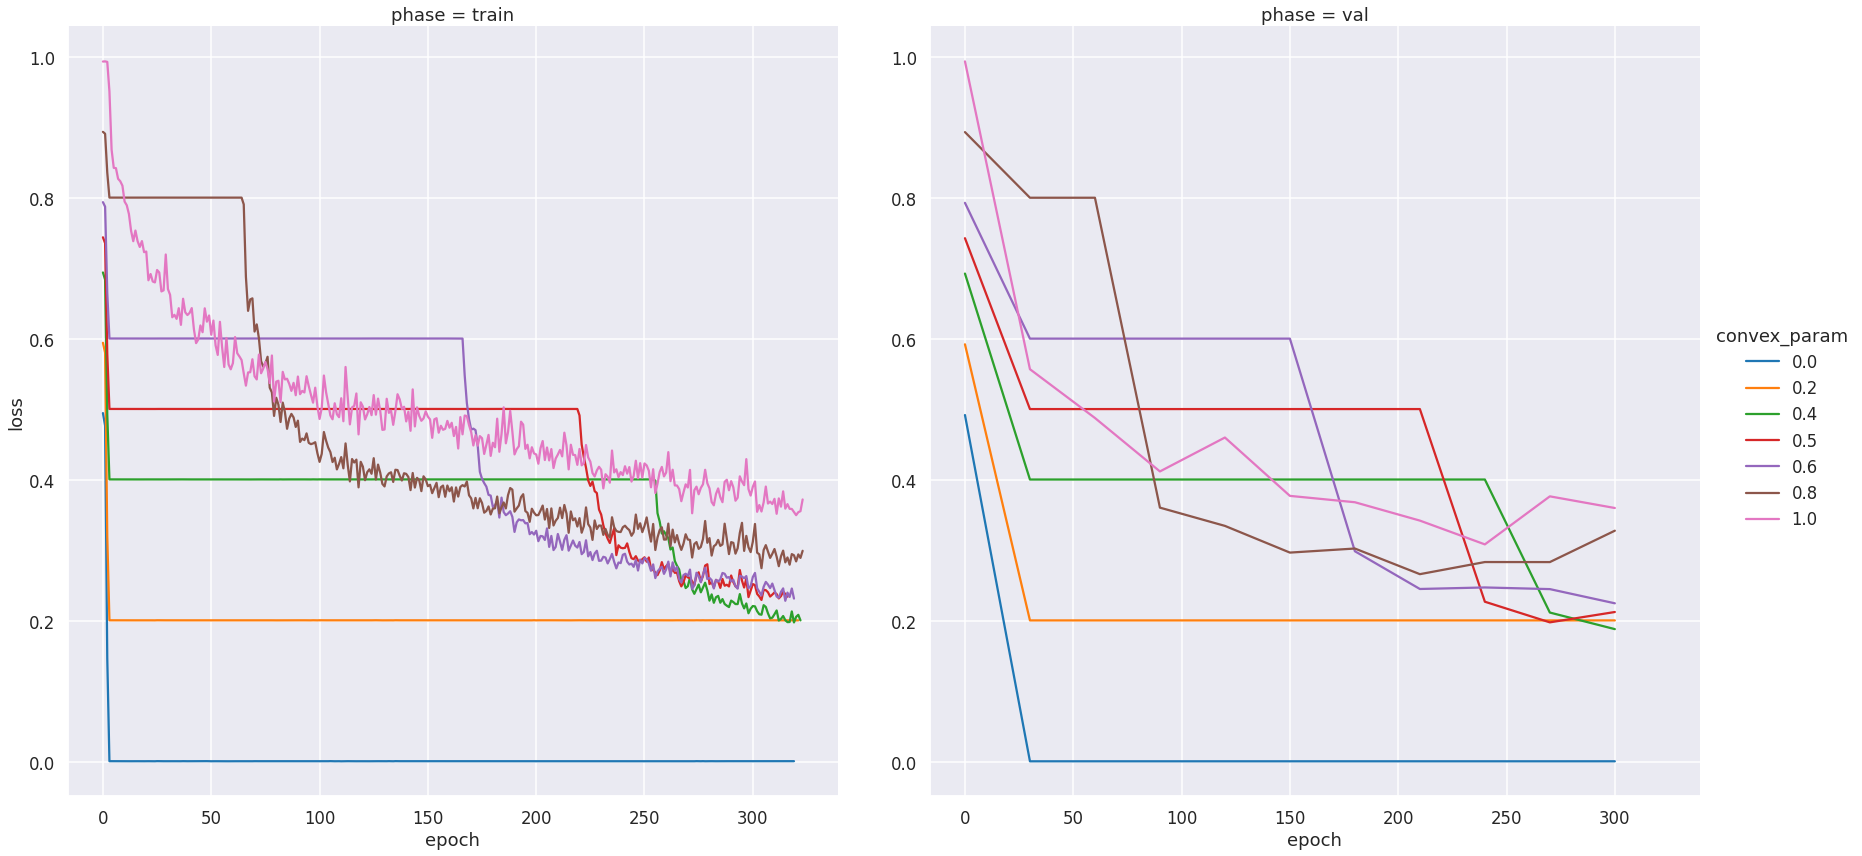

In [6]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='loss',
    hue='convex_param',
    col='phase',
    kind='line',
    height=12,
    facet_kws=dict(sharey=False),
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.12)
# Set the y axis to be between 0 and 1
# g.set(ylim=(0, 1000))

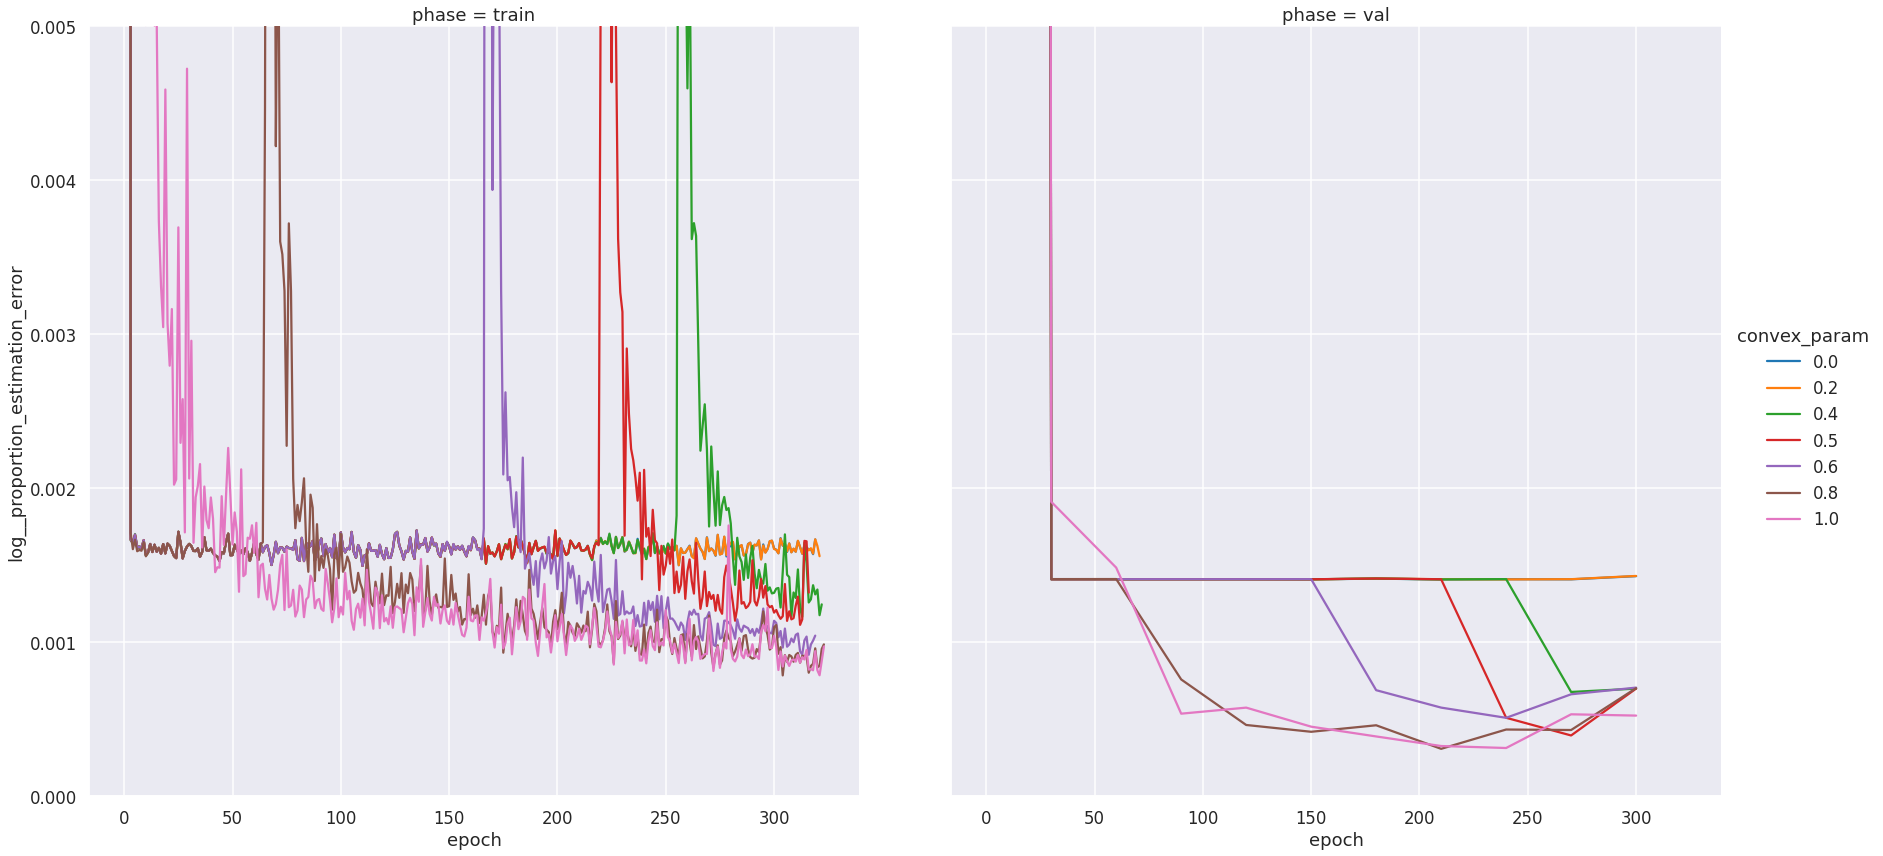

In [12]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='log__proportion_estimation_error',
    hue='convex_param',
    col='phase',
    kind='line',
    height=12,
    # facet_kws=dict(sharey=False),
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.12)
# Set the y axis to be between 0 and 1
g.set(ylim=(0, 0.005))

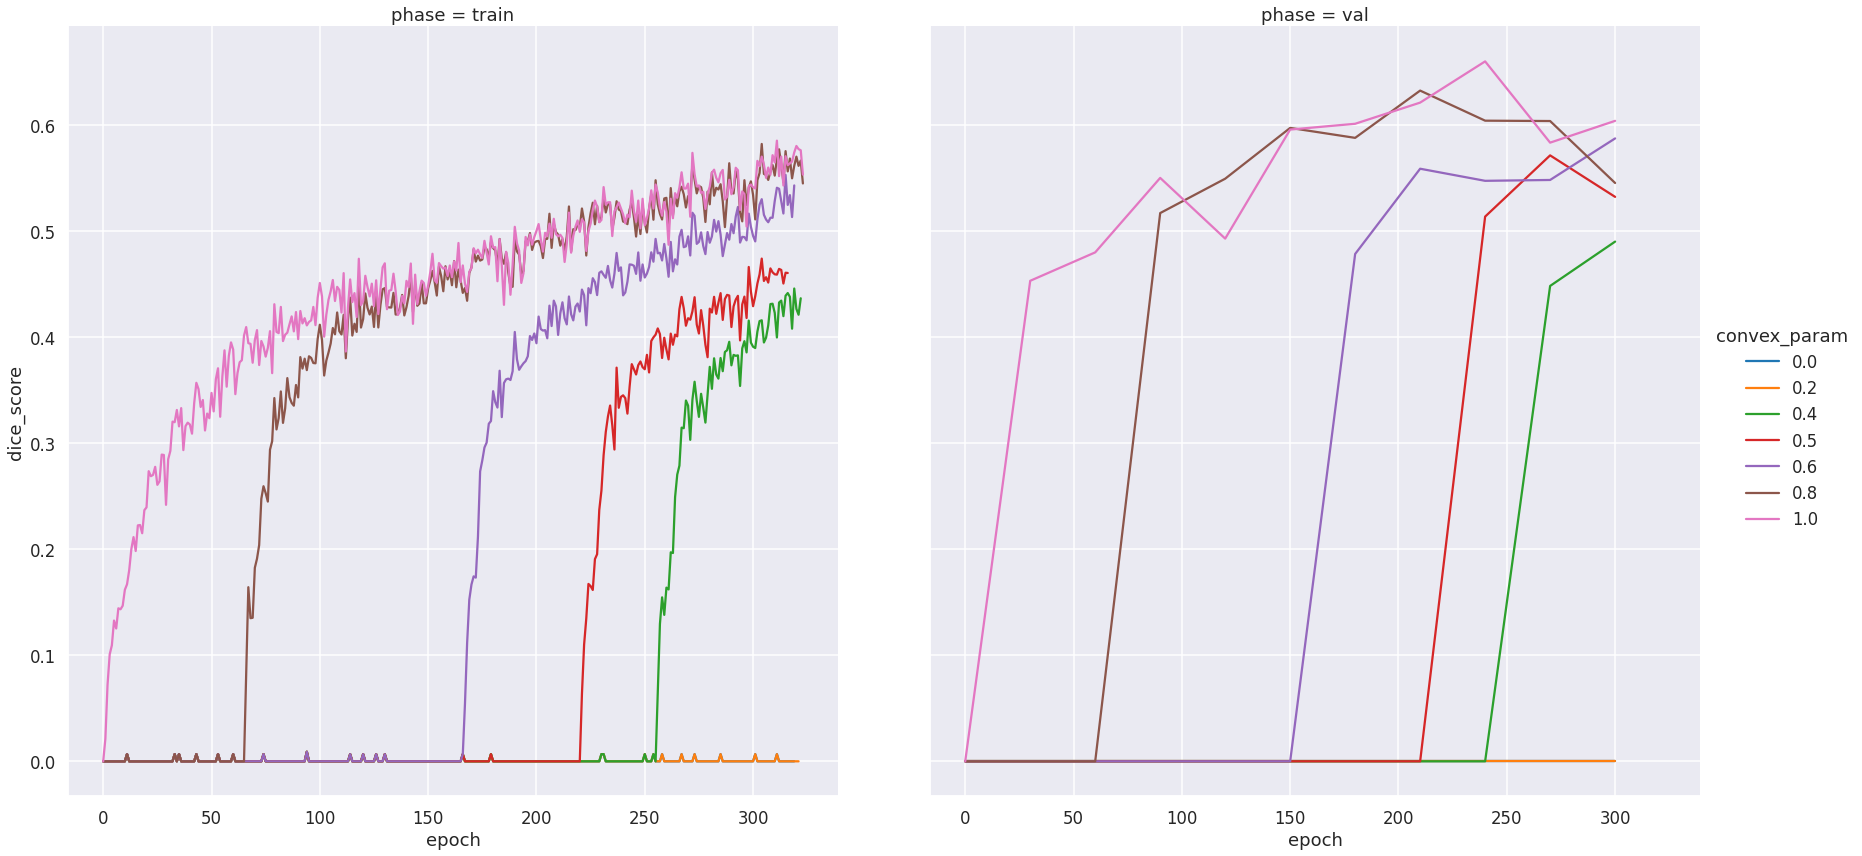

In [8]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    hue='convex_param',
    col='phase',
    kind='line',
    height=12,
    # facet_kws=dict(sharey=False),
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.12)
# Set the y axis to be between 0 and 1
# g.set(ylim=(0, 1000))

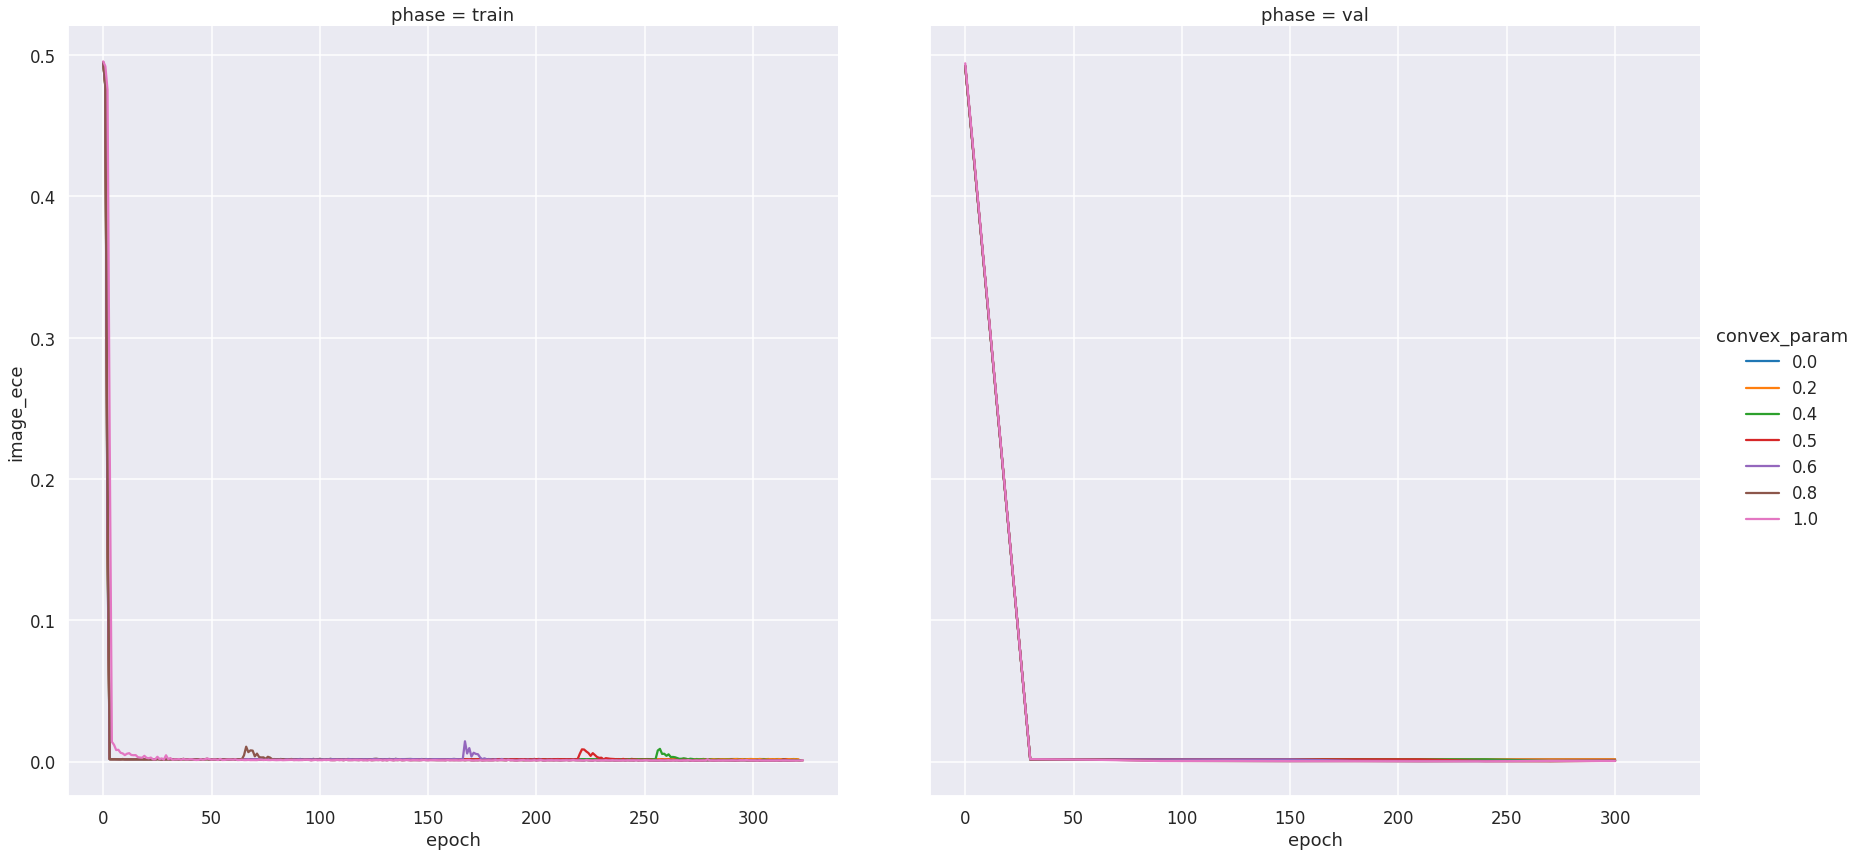

In [9]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='image_ece',
    hue='convex_param',
    col='phase',
    kind='line',
    height=12,
    # facet_kws=dict(sharey=False),
)

# Set column spcig
g.fig.subplots_adjust(wspace=0.12)